In [1]:
import glob #to read the files
import json #to work if .json
import numpy as np #to math
import pandas as pd #to save the data
import math #to convertion calculus
from astropy.time import Time #to time converting
from astropy import units #time correction
from astropy.coordinates import SkyCoord #time correction
from scipy import interpolate #to interpolate the wavelength and flux
from tabulate import tabulate #to export in table format
from scipy.interpolate import interp1d
#import scipy.optimize as opt
from scipy import optimize

def radec_to_xyz(ra, dec):
    x = math.cos(np.deg2rad(dec)) * math.cos(np.deg2rad(ra))
    y = math.cos(np.deg2rad(dec)) * math.sin(np.deg2rad(ra))
    z = math.sin(np.deg2rad(dec))

    return np.array([x, y, z], dtype=np.float64)

#functions from sncosmo
def cmb_dz(ra, dec):
    """See http://arxiv.org/pdf/astro-ph/9609034
     CMBcoordsRA = 167.98750000 # J2000 Lineweaver
     CMBcoordsDEC = -7.22000000
    """

    # J2000 coords from NED
    CMB_DZ = 371000. / 299792458.
    CMB_RA = 168.01190437
    CMB_DEC = -6.98296811
    CMB_XYZ = radec_to_xyz(CMB_RA, CMB_DEC)

    coords_xyz = radec_to_xyz(ra, dec)
    
    dz = CMB_DZ * np.dot(CMB_XYZ, coords_xyz)

    return dz

def cmb_to_helio(z, ra, dec):
    """Convert from CMB-frame redshift to heliocentric redshift.
    
    Parameters
    ----------
    z : float
        CMB-frame redshift.
    ra, dec: float
        RA and Declination in degrees (J2000).
    """

    dz = -cmb_dz(ra, dec)
    one_plus_z_pec = math.sqrt((1. + dz) / (1. - dz))
    one_plus_z_helio = (1. + z) * one_plus_z_pec

    return one_plus_z_helio - 1.


In [2]:
def one_lenght_redshift(u):
    
    redshift_value = None
    
    #if there is kind in the list continue
    if "kind" in data[url]["redshift"][0]:

        #if its heliocentric pick then
        if data[url]["redshift"][0]["kind"] == "heliocentric":

            redshift_value = float(data[url]["redshift"][0]["value"])
            print(redshift_value)
        '''
        #if its cmb pick then    
        if data[url]["redshift"][0]["kind"] == "cmb":

            #convertion of hours to degrees
            if data[url]["ra"][0]["u_value"] == "hours" and data[url]["dec"][0]["u_value"] == "degrees":

                c = SkyCoord(str(data[url]["ra"][0]["value"]),str(data[url]["dec"][0]["value"]), unit=(units.hourangle, units.deg))

            elif data[url]["ra"][0]["u_value"] == "hours" and data[url]["dec"][0]["u_value"] == "hours":

                c = SkyCoord(str(data[url]["ra"][0]["value"]),str(data[url]["dec"][0]["value"]), unit=(units.hourangle, units.hourangle))

            else:

                print("Erro!")

            redshift_value = float(cmb_to_helio(float(data[url]["redshift"][0]["value"]), c.ra.deg, c.dec.deg))
            print(redshift_value)
        '''
    #if there is only 1 and its not specificated
    else:
            
        redshift_value = float(data[url]["redshift"][0]["value"])
        print(redshift_value)
    
    return redshift_value

In [3]:
def redshift_selection(url):
    
    redshift_value = None
    
    for nredshift in range(0,len(data[url]["redshift"])):
            
        #if there is kind in the list continue
        if "kind" in data[url]["redshift"][nredshift]:

            #if its heliocentric pick then
            if data[url]["redshift"][nredshift]["kind"] == "heliocentric":

                redshift_value = float(data[url]["redshift"][nredshift]["value"])
                print(redshift_value)
                break
                
            '''
            #if its cmb 
            if data[url]["redshift"][nredshift]["kind"] == "cmb":

                #convertion of hours to degrees
                if data[url]["ra"][nredshift]["u_value"] == "hours" and data[url]["dec"][nredshift]["u_value"] == "degrees":

                    c = SkyCoord(str(data[url]["ra"][nredshift]["value"]),str(data[url]["dec"][nredshift]["value"]), unit=(units.hourangle, units.deg))

                elif data[url]["ra"][nredshift]["u_value"] == "hours" and data[url]["dec"][nredshift]["u_value"] == "hours":

                    c = SkyCoord(str(data[url]["ra"][nredshift]["value"]),str(data[url]["dec"][nredshift]["value"]), unit=(units.hourangle, units.hourangle))

                else:

                    print("Erro 1!")

                #convertion of cmb to heliocentric
                redshift_value = float(cmb_to_helio(float(data[url]["redshift"][nredshift]["value"]), c.ra.deg, c.dec.deg))
                print(redshift_value)
                break
            '''
    return redshift_value

In [4]:
def redshift_HB(url):
    redshift_value = None
    '''
    maxredshift = None
    
    sumredshift = 0
    HB_test = 0
    for nredshift in range(0,len(data[url]["redshift"])):
            
        #if not realize a sum to obtain a mean value
        if "kind" not in data[url]["redshift"][nredshift]:
            
            sumredshift = sumredshift + float(data[url]["redshift"][nredshift]["value"])
                
            #if the sn is in the hubnle flow realize a mean value of the redshifts
            if float(data[url]["redshift"][nredshift]["value"]) > 0.15:
                
                HB_test = 1
                
            #if not the first redshift is the max redshift
            if nredshift == 0:
                maxredshift = float(data[url]["redshift"][nredshift]["value"])
                
            else:
                #then analise if the next redshift is grater than max redshift 
                if float(data[url]["redshift"][nredshift]["value"]) > maxredshift:
                        
                    maxredshift = float(data[url]["redshift"][nredshift]["value"])
        
    if HB_test == 1:
            
        #if sne is in the hubble flow realize a mean value
        redshift_value = sumredshift/len(data[url]["redshift"])
        print(redshift_value)  
    elif HB_test == 0:
            
        #if not the maximum redshift is the heliocentric redshift
        redshift_value = maxredshift
        print(redshift_value)
      '''  
    return redshift_value

In [5]:
def redshift_value(url):
    redshift_func = None
    #if there is 1 value use it
    if len(data[url]["redshift"]) == 1:
        
        redshift_func = one_lenght_redshift(url)

    #if not...
    if len(data[url]["redshift"]) == 1 and redshift_func is None:
        
        print("redshift nao encontrado")
        
    if len(data[url]["redshift"]) > 1:
        
        redshift_func = redshift_selection(url)
                
    if len(data[url]["redshift"]) > 1 and redshift_func is None:
        redshift_func = redshift_HB(url)
        
    return redshift_func

In [6]:
def max_time(url):
    
    t0_max_photo = None
    alert_photo = 0
    
    dat_photo_vega = []
    dat_photo_csp = []
    dat_photo_ab = []
    dat_photo_Swope = []
    #dat_photo_Sem = []
    dat_photo_Swift = []
    
    
 
    for k in range(0,len(data[url]["photometry"])):
        
        
        if "band" in data[url]["photometry"][k]:
            
            if data[url]["photometry"][k]["band"] == "B":
                
                
                
                if "system" in data[url]["photometry"][k]:
                    
                    if data[url]["photometry"][k]["system"] == "Vega":
                
                        if float(data[url]["photometry"][k]["time"]) != float(data[url]["photometry"][k-1]["time"]):
                            dat_photo_vega.append([float(data[url]["photometry"][k]["time"]),float(data[url]["photometry"][k]["magnitude"])])

    
                    if data[url]["photometry"][k]["system"] == "CSP":
            
                        if float(data[url]["photometry"][k]["time"]) != float(data[url]["photometry"][k-1]["time"]):
                            dat_photo_csp.append([float(data[url]["photometry"][k]["time"]),float(data[url]["photometry"][k]["magnitude"])])
            
            

                    if data[url]["photometry"][k]["system"] == "AB":
            
                        if float(data[url]["photometry"][k]["time"]) != float(data[url]["photometry"][k-1]["time"]):
                            dat_photo_ab.append([float(data[url]["photometry"][k]["time"]),float(data[url]["photometry"][k]["magnitude"])])
 
            
    
                    if data[url]["photometry"][k]["system"] == "Swope":
            
                        if float(data[url]["photometry"][k]["time"]) != float(data[url]["photometry"][k-1]["time"]):
                            dat_photo_Swope.append([float(data[url]["photometry"][k]["time"]),float(data[url]["photometry"][k]["magnitude"])])
      
                
                    if data[url]["photometry"][k]["system"] == "Swift":
            
                        if float(data[url]["photometry"][k]["time"]) != float(data[url]["photometry"][k-1]["time"]):
                            dat_photo_Swift.append([float(data[url]["photometry"][k]["time"]),float(data[url]["photometry"][k]["magnitude"])])
      
                      
                '''
                if "system" not in data[url]["photometry"][k]:
        
                    if float(data[url]["photometry"][k]["time"]) != float(data[url]["photometry"][k-1]["time"]):
                            dat_photo_Sem.append([float(data[url]["photometry"][k]["time"]),float(data[url]["photometry"][k]["magnitude"])])
    
                '''
                       
    #print("---------------------------------------------------------")
    df_photo_vega = pd.DataFrame(dat_photo_vega, columns=['x','y'])

    df_photo_vega.sort_values(by=['x'])
    
    
    df_photo_csp = pd.DataFrame(dat_photo_csp, columns=['x','y'])

    df_photo_csp.sort_values(by=['x'])  
    
    
    df_photo_ab = pd.DataFrame(dat_photo_ab, columns=['x','y'])

    df_photo_ab.sort_values(by=['x']) 
    
    df_photo_Swope = pd.DataFrame(dat_photo_Swope, columns=['x','y'])

    df_photo_Swope.sort_values(by=['x']) 
    
    '''
    df_photo_Sem = pd.DataFrame(dat_photo_Sem, columns=['x','y'])

    df_photo_Sem.sort_values(by=['x']) 
    '''
    
    df_photo_Swift = pd.DataFrame(dat_photo_Swift, columns=['x','y'])

    df_photo_Swift.sort_values(by=['x']) 
    #print(df_photo['x'])
    

    
    if len(df_photo_vega['y']) > 0:
    
    
        min_pos_photo = df_photo_vega['y'].idxmin(axis=0)

        if min_pos_photo > 3:
            f = interp1d(df_photo_vega['x'], df_photo_vega['y'], kind="linear", fill_value="extrapolate")

            result = optimize.minimize_scalar(f)

            if result.success == True:
                alert_photo = 1
                #print("sucesso no vega")
                if df_photo_vega['x'][0] < result.x < df_photo_vega['x'][len(df_photo_vega['x'])-1]:
                    
                    t0_max_photo = result.x
                    
                    
    if len(df_photo_csp['y']) > 0 and alert_photo == 0:
                
        if len(df_photo_csp['y']) > 0:
    
                
            min_pos_photo = df_photo_csp['y'].idxmin(axis=0)

            if min_pos_photo > 3:
                
                f = interp1d(df_photo_csp['x'], df_photo_csp['y'], kind="linear", fill_value="extrapolate")

                result = optimize.minimize_scalar(f)
                
                
                if result.success == True:
                    alert_photo = 1
                    #print("sucesso no csp")
                    if df_photo_csp['x'][0] < result.x < df_photo_csp['x'][len(df_photo_csp['x'])-1]:

                        t0_max_photo = result.x
                        
    if len(df_photo_ab['y']) > 0 and alert_photo == 0:
                
        if len(df_photo_ab['y']) > 0:
                            
            min_pos_photo = df_photo_ab['y'].idxmin(axis=0)
            #print(min_pos_photo)
            if min_pos_photo > 3:
                
                f = interp1d(df_photo_ab['x'], df_photo_ab['y'], kind="linear", fill_value="extrapolate")

                result = optimize.minimize_scalar(f)
                
                
                if result.success == True:
                    alert_photo = 1
                    #print("sucesso no ab")
                    if df_photo_ab['x'][0] < result.x < df_photo_ab['x'][len(df_photo_ab['x'])-1]:

                        t0_max_photo = result.x
                        
    if len(df_photo_Swope['y']) > 0 and alert_photo == 0:
                
        if len(df_photo_Swope['y']) > 0:
                
            min_pos_photo = df_photo_Swope['y'].idxmin(axis=0)
            #print(min_pos_photo)
            if min_pos_photo > 3:
                
                f = interp1d(df_photo_Swope['x'], df_photo_Swope['y'], kind="linear", fill_value="extrapolate")

                result = optimize.minimize_scalar(f)
                
                
                if result.success == True:
                    alert_photo = 1
                    #print("sucesso no ab")
                    if df_photo_Swope['x'][0] < result.x < df_photo_Swope['x'][len(df_photo_Swope['x'])-1]:

                        t0_max_photo = result.x
    '''                 
    if len(df_photo_Sem['y']) > 0 and alert_photo == 0:
                
        if len(df_photo_Sem['y']) > 0:
            
            datax_Sem.append(np.array(df_photo_Sem['x']))
            datay_Sem.append(np.array(df_photo_Sem['y']))
                
            min_pos_photo = df_photo_Sem['y'].idxmin(axis=0)
            #print(min_pos_photo)
            if min_pos_photo > 3:
                
                f = interp1d(df_photo_Sem['x'], df_photo_Sem['y'], kind="linear", fill_value="extrapolate")

                result = optimize.minimize_scalar(f)
                
                
                if result.success == True:
                    alert_photo = 1
                    #print("sucesso no ab")
                    if df_photo_Sem['x'][0] < result.x < df_photo_Sem['x'][len(df_photo_Sem['x'])-1]:

                        t0_max_photo = result.x
                        
    '''
    
    if len(df_photo_Swift['y']) > 0 and alert_photo == 0:
                
        if len(df_photo_Swift['y']) > 0:
                            
            min_pos_photo = df_photo_Swift['y'].idxmin(axis=0)
            #print(min_pos_photo)
            if min_pos_photo > 3:
                
                f = interp1d(df_photo_Swift['x'], df_photo_Swift['y'], kind="linear", fill_value="extrapolate")

                result = optimize.minimize_scalar(f)
                
                
                if result.success == True:
                    alert_photo = 1
                    #print("sucesso no ab")
                    if df_photo_Swift['x'][0] < result.x < df_photo_Swift['x'][len(df_photo_Swift['x'])-1]:

                        t0_max_photo = result.x
                        
    if t0_max_photo is not None:
        
        return t0_max_photo
    
    else:
        
        
        t0dat = data[url]["maxdate"][0]["value"]
        t0_max_photo = t0dat.split("/")
        t0_max_photo=str(t0_max_photo[0])+'-'+str(t0_max_photo[1])+'-'+str(t0_max_photo[2])
        t0_max_photo=Time(t0_max_photo).mjd
        
        return t0_max_photo

In [7]:
file = open("training_names.txt")
lines = file.readlines()
file.close()

sn_names = []

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()
    sn_names.append(co[0])

In [7]:
sn_names=glob.glob("*.json")

In [8]:
len(sn_names)

823

In [9]:
histo_photo = []

final_gradex = np.linspace(-20, 50, 71)
final_gradey = np.linspace(2000, 9200, 201)
final_flux = [[[] for x in range(0,len(final_gradey))] for y in range(0,len(final_gradex))] 
tolerance_x = 0.48
#tolerance_y = 0.5
total_sn = 0
#print(final_gradex)
#print(final_gradey)
#names of .json in the folder
#names=glob.glob("*.json")
#for each sn
for u in range(0,len(sn_names)):
    print(sn_names[u])

    #reading the .json file
    with open(sn_names[u], "r") as read_file:
        data = json.load(read_file)

    #catching the name of supernova
    url=sn_names[u]
    if url.endswith('.json'):
        url = url[:-5]
    #print(url)
    #defining the lists
    wavelengthdat=[]
    fluxdat=[]
    timedat=[]

    redshift = redshift_value(url)
        
    #print("valor final")    
    #print(redshift)
    
    spec_functions = []
    max_min = []
    
    t0 = max_time(url)
    if redshift is not None and t0 is not None:
        
        #print(redshift)
        #spectra data
        i=0
        n=0
        times = []
        max_fluxes = []
        spectra_number = 0
        time_verification = 0
        wavelength_verification = 0
        while i < len(data[url]["spectra"]):
            
            if "time" in data[url]["spectra"][i]:
                print
                spectratime = float(data[url]["spectra"][i]["time"]) - float(t0)
                #print(spectratime)
                #verifing if its calibrated and if it have a redshift correction 
                alert1 = 0 #for calibration
                alert2 = 0 #for redshift correction

                if data[url]["spectra"][i]["u_fluxes"] == "erg/s/cm^2/Angstrom":          
                    alert1 = 1 #first alert

                    if "deredshifted" in data[url]["spectra"][i]:
                        alert2 = 1 #second alert

                #if its calibrated and corrected
                if alert1 == 1 and alert2 == 1:
                    #print("ok")
                    #there are 3 collumns: wavelength flux and flux error
                    if len(data[url]["spectra"][i]["data"][0]) == 3:

                        df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux', 'fluxerror'])

                        #sort the data by wavelength
                        df.sort_values(by=['wavelength'])

                        #converting to float
                        df['wavelength'] = df['wavelength'].astype(float)
                        df['flux'] = df['flux'].astype(float)

                        #to kill negative fluxes
                        fluxtemp = []
                        for var in range(0,len(df['flux'])):
                            if (df['flux'][var] > 0):
                                fluxtemp.append(df['flux'][var])
                            else:
                                fluxtemp.append(0)            

                        '''        
                        max_flux = max(fluxtemp)
                        max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                        if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                            max_wavelength = df['wavelength'][max_flux_pos[0]]
                            if 3800 < max_wavelength < 4200:

                                wavelength_verification = 1
                                max_fluxes.append(max_flux)
                                times.append(spectratime) 


                        if min_value_wavelength < 4000 < max_value_wavelength:
                            f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                            if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                                ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                            if 3800 < ab[0] < 4200: 

                                wavelength_verification = 1
                                max_flux.append(f(ab[0]))
                                times.append(spectratime)
                        '''                
                        spectra_number = spectra_number + 1    
                        #making a list of lists 
                        wavelengthdat.append(np.array(df['wavelength']))
                        fluxdat.append(np.array(fluxtemp))
                        #print(spectratime)
                        #for time
                        timedat.append(spectratime)

                        spec_functions.append(interp1d(df['wavelength'], fluxtemp))
                        max_min.append([min(df['wavelength']),max(df['wavelength'])])

                    #there are 2 collumns: wavelength and flux
                    if len(data[url]["spectra"][i]["data"][0]) == 2:

                        df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux'])

                        #sort the data by wavelength
                        df.sort_values(by=['wavelength'])

                        #converting to float
                        df['wavelength'] = df['wavelength'].astype(float)
                        df['flux'] = df['flux'].astype(float)

                        #to kill negative fluxes
                        fluxtemp = []
                        for var in range(0,len(df['flux'])):
                            if (df['flux'][var] > 0):
                                fluxtemp.append(df['flux'][var])
                            else:
                                fluxtemp.append(0)            

                        '''        
                        max_flux = max(fluxtemp)
                        max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                        if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                            max_wavelength = df['wavelength'][max_flux_pos[0]]
                            if 3800 < max_wavelength < 4200:

                                wavelength_verification = 1
                                max_fluxes.append(max_flux)
                                times.append(spectratime) 


                        if min_value_wavelength < 4000 < max_value_wavelength:
                            f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                            if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                                ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                            if 3800 < ab[0] < 4200: 

                                wavelength_verification = 1
                                max_flux.append(f(ab[0]))
                                times.append(spectratime)
                        '''                
                        spectra_number = spectra_number + 1    
                        #making a list of lists 
                        wavelengthdat.append(np.array(df['wavelength']))
                        fluxdat.append(np.array(fluxtemp))

                        #for time
                        timedat.append(spectratime)
                        #print(spectratime)
                        spec_functions.append(interp1d(df['wavelength'], fluxtemp))
                        max_min.append([min(df['wavelength']),max(df['wavelength'])])

                #if its calibrated, redshift not adjusted but with a clear redshift
                if alert1 ==1 and alert2 == 0:   

                    #there are 3 collumns: wavelength flux and flux error 
                    if len(data[url]["spectra"][i]["data"][0]) == 3:

                        df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux', 'fluxerror'])

                        #sort the data by wavelength
                        df.sort_values(by=['wavelength'])

                        #converting to float
                        df['wavelength'] = df['wavelength'].astype(float)
                        df['flux'] = df['flux'].astype(float)

                        #to kill negative fluxes
                        fluxtemp = []
                        for var in range(0,len(df['flux'])):
                            if (df['flux'][var] > 0):
                                fluxtemp.append(df['flux'][var])
                            else:
                                fluxtemp.append(0)


                        #redshift correction
                        fluxtemp = [x * (((1+redshift))**3) for x in fluxtemp] #for the flux           
                        df['wavelength'] = [x * (1/(1+redshift)) for x in df['wavelength']] #for the wavelength
                        spectratime = spectratime/(1+redshift) #for time

                        '''
                        max_flux = max(fluxtemp)
                        max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                        if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                            max_wavelength = df['wavelength'][max_flux_pos[0]]
                            if 3800 < max_wavelength < 4200:

                                wavelength_verification = 1
                                max_fluxes.append(max_flux)
                                times.append(spectratime) 


                        if min_value_wavelength < 4000 < max_value_wavelength:
                            f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                            if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                                ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                            if 3800 < ab[0] < 4200: 

                                wavelength_verification = 1
                                max_flux.append(f(ab[0]))
                                times.append(spectratime)
                        '''                
                        spectra_number = spectra_number + 1    
                        #making a list of lists 
                        wavelengthdat.append(np.array(df['wavelength']))
                        fluxdat.append(np.array(fluxtemp))
                        #print(spectratime)
                        #for time
                        timedat.append(spectratime)

                        spec_functions.append(interp1d(df['wavelength'], fluxtemp))
                        max_min.append([min(df['wavelength']),max(df['wavelength'])])

                    #there are 2 collumns: wavelength flux and flux error 
                    if len(data[url]["spectra"][i]["data"][0]) == 2:

                        df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux'])

                        #sort the data by wavelength
                        df.sort_values(by=['wavelength'])

                        #converting to float
                        df['wavelength'] = df['wavelength'].astype(float)
                        df['flux'] = df['flux'].astype(float)

                        #to kill negative fluxes
                        fluxtemp = []
                        for var in range(0,len(df['flux'])):
                            if (df['flux'][var] > 0):
                                fluxtemp.append(df['flux'][var])
                            else:
                                fluxtemp.append(0)

                        #redshift correction
                        fluxtemp = [x * (((1+redshift))**3) for x in fluxtemp] #for the flux           
                        df['wavelength'] = [x * (1/(1+redshift)) for x in df['wavelength']] #for the wavelength
                        spectratime = spectratime/(1+redshift) #for time

                        '''        
                        max_flux = max(fluxtemp)
                        max_flux_pos = [i for i, j in enumerate(fluxtemp) if j == max_flux]
                        if max_flux_pos[0] != 1 and max_flux_pos[0] != 2:
                            max_wavelength = df['wavelength'][max_flux_pos[0]]
                            if 3800 < max_wavelength < 4200:

                                wavelength_verification = 1
                                max_fluxes.append(max_flux)
                                times.append(spectratime) 


                        if min_value_wavelength < 4000 < max_value_wavelength:
                            f = interp1d(df['wavelength'], fluxtemp, kind='linear')
                            if max(fluxtemp) != fluxtemp[0] and max(fluxtemp) != fluxtemp[-1]:
                                ab = opt.fmin(lambda x: -f(x), 4000, disp=False)

                            if 3800 < ab[0] < 4200: 

                                wavelength_verification = 1
                                max_flux.append(f(ab[0]))
                                times.append(spectratime)
                        '''                
                        spectra_number = spectra_number + 1    
                        #making a list of lists 
                        wavelengthdat.append(np.array(df['wavelength']))
                        fluxdat.append(np.array(fluxtemp))
                        #print(spectratime)
                        #for time
                        timedat.append(spectratime)

                        spec_functions.append(interp1d(df['wavelength'], fluxtemp))
                        max_min.append([min(df['wavelength']),max(df['wavelength'])])

            i = i + 1

        
        total_sn = total_sn + 1   
            #print(":)")

        #else:
            #print(":(")

        #print(spectra_number)

        for m in range(0,len(final_gradex)):

            for n in range(0,len(final_gradey)):

                for i in range(0,len(timedat)):
                    
                    if (final_gradex[m] - tolerance_x) < timedat[i] < (final_gradex[m] + tolerance_x):

                      
                            if  max_min[i][0] + 1 < final_gradey[n] < max_min[i][1] - 1:
                        
                                final_flux[m][n].append(spec_functions[i](final_gradey[n]))       
                                #print(final_gradex[m], final_gradey[n])
                               


SN1990G.json
0.035781
SN1999Q.json
SN2007at.json
0.0542
PTF10qwg.json
0.0679
SN2007on.json
0.006494
SN2005dh.json
0.01459
SN2002cx.json
0.02396
SN2002eb.json
0.027536
SN2000cm.json
redshift nao encontrado
SN2002bf.json
0.024197
SN2007jg.json
SN2004bl.json
0.01732
SN1991bb.json
0.02656
SN2006ne.json
redshift nao encontrado
SN2006tv.json
SN2006pr.json
0.1265
SN1991bd.json
0.01272
SN2007rj.json
redshift nao encontrado
SN1993C.json
0.01274
SN1996E.json
SN1998aq.json
0.003699
SN2001G.json
0.01677
ESSENCEm138.json
PTF10bjs.json
SN2007ul.json
SN2005P.json
0.00948
SN2016F.json
SN2002jw.json
SN2008E.json
redshift nao encontrado
SN2014bg.json
0.036091
SN2017jdy.json
SN2013aj.json
0.009
SN1993ac.json
SN2002iy.json
LSQ14nr.json
0.091
SN2000cp.json
0.034204
SN2003it.json
0.025121
SN2007ob.json
0.0339
SN2002av.json
0.049041
SN2006tk.json
SN2016cvm.json
0.069
SN2008fp.json
PTF11bui.json
0.02846
SN2007ae.json
0.064387
SN2006S.json
0.032102
PTF10yux.json
0.0578
SN2000dn.json
0.032065
SN2006do.json
0.02

SN2004gu.json
0.045858
SN2007qa.json
0.10858
SN2000fd.json
redshift nao encontrado
SN1999dq.json
0.01433
SN2007ap.json
0.015818
SN2008gp.json
ESSENCEp527.json
SN2013bg.json
0.066
SN2013bx.json
SN1960H.json
redshift nao encontrado
SN2018bhb.json
SN2008bq.json
SN2003aa.json
SN2002hw.json
0.017535
SN2001cp.json
0.022402
SN2006py.json
redshift nao encontrado
SN1999U.json
SN1999ef.json
0.03914
SN2017hho.json
SN2003ez.json
SN2003eh.json
SN2007tg.json
SN2003gt.json
0.015657
SN1992ac.json
redshift nao encontrado
SN1997bq.json
SN2013cs.json
0.009
SN2016A.json
SN2003du.json
0.006381
SN2001ck.json
0.034721
SN2018hpu.json
SN1956A.json
SN1994D.json
0.00149
SN2002hu.json
0.036699
SN2007ax.json
0.006861
SN2009ag.json
0.00864
SN2018bfh.json
SN2004as.json
0.031021
PTF11dsb.json
0.19
SN2015bp.json
0.004069


/home/user/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2346: RuntimeWarning: overflow encountered in double_scalars
  if (w - xc) * (xb - w) > 0.0:
/home/user/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2362: RuntimeWarning: overflow encountered in double_scalars
  elif (w - wlim)*(wlim - xc) >= 0.0:
/home/user/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: overflow encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/home/user/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2334: RuntimeWarning: overflow encountered in double_scalars
  tmp1 = (xb - xa) * (fb - fc)
/home/user/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2335: RuntimeWarning: overflow encountered in double_scalars
  tmp2 = (xb - xc) * (fb - fa)
/home/user/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2336: RuntimeWarning: invalid value encountered in double_scalars
  

SN2016cbx.json
SN2001ic.json
0.044241
PTF10nlg.json
0.0562
SN2009D.json
0.025007
SN1980N.json
0.005871
SN2005mc.json
SN2018pc.json
SN2018epx.json
SN2003U.json
0.028341
SN1999ek.json
0.01752
SN2015bz.json
SN1999ee.json
0.01141
SN2005hj.json
redshift nao encontrado
SN2005cc.json
redshift nao encontrado
SN2006le.json
0.017432
SN2006cm.json
0.016341
SN2011by.json
redshift nao encontrado
SN2001eh.json
0.037039
SN2006md.json
0.299
SN2007aj.json
0.011
SN2002gc.json
0.02131
SN2005na.json
SN1999dg.json
0.022059
SN2002jr.json
SN2009ab.json
SN2007rh.json
0.1988
SN2006mk.json
SN1998bn.json
0.005981
SN2008bf.json
0.024027
SN1998dk.json
0.01322
SN2002db.json
0.036218
SN2003ae.json
0.0329
SN2006fw.json
SN2018fer.json
0.136
SN2003gn.json
0.03445
SN2002jy.json
0.0196
SN2008hv.json
SN1996bo.json
0.01728
SN2007ca.json
0.014066
SN2006dm.json
0.022019
SN2016adn.json
0.023166
SN2004fu.json
0.00921
SN2001az.json
0.040701
SN2000dm.json
0.01503
SN2002cs.json
0.01577
SN2008ds.json
0.02103
SN2007rg.json
0.2713
S

/home/user/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2366: RuntimeWarning: overflow encountered in double_scalars
  elif (w - wlim)*(xc - w) > 0.0:


SN2012fw.json
0.0186
SN1999N.json
PTF09foz.json
0.05331
SN2011im.json
0.016228
SN1991ak.json
0.01015
PTF10ops.json
0.06
SN2015F.json
0.00541
SN2005eo.json
PTF10trs.json
0.073
SN2008s1.json
0.0221
SN2001ay.json
0.03024
SN2005eq.json
SN1999cp.json
0.00948
SN2005eu.json
0.034901
SN1981B.json
0.006031
PTF10wof.json
PTF11ecn.json
0.062
SN2008dr.json
0.041449
PTF10ndc.json
0.0818
SN2007fb.json
0.018026
SN2007kd.json
0.02418
SN2000dp.json
0.034521
SN2003in.json
0.02135
SN2007cg.json
0.033196
SN1995Y.json
redshift nao encontrado
SN2005gj.json
0.0616
SN2013aa.json
0.003999
SN2006H.json
0.01399
SN2003im.json
0.01936
SN1997cn.json
0.0162
SN2001br.json
0.020628
CSS120419:143825+175814.json
SN1995bd.json
SN2018avp.json
SN2008C.json
SN1999gm.json
0.042383
SN2001cj.json
0.024233
SN1993ae.json
0.01905
SN2006os.json
SN2002bg.json
0.04274
SN2018ep.json
SN2002ef.json
0.023977
SN2006ax.json
0.016725
SN2004da.json
0.01588
SN2006E.json
SN2008ar.json
0.026147
SN1991bc.json
0.02135
SN2006bu.json
0.084001
SN19

LSQ12gdj.json
0.03
PTF10ygr.json
0.12
SN1992A.json
SN2009jb.json
0.0237
SN2007cq.json
0.0259
SN2012cg.json
0.001458
SN2005hc.json
redshift nao encontrado
SN2007ti.json
SN2006dv.json
0.03297
SN2008bt.json
0.01536
SN2002de.json
0.028116
SN1998eg.json
0.02476
PTF11hub.json
0.0287
SN2005hf.json
0.04311
SN2005dv.json
0.010404
SN1995D.json
0.006561
SN2000dg.json
0.03849
SN2005lz.json
0.040001
SN2006N.json
0.014277
SN1994ae.json
0.004266
SN2002G.json
0.033737
SN2007sr.json
0.005417
SN2005bg.json
SN1999M.json
SN2001U.json
0.02863
iPTF14hvh.json
ESSENCEn406.json
LSQ12bpy.json
0.111
SN2003M.json
0.02424
SN2004eo.json
SN2019mkv.json
SN1991M.json
0.007235
SN2007ty.json
SN1991K.json
0.017
SN2006ac.json
0.023106
SN1997do.json
0.01012
SN2017hng.json
0.039
SN2008Q.json
0.007935
PTF10zak.json
0.04038
LSQ12fxd.json
0.031
SN2007un.json
SN2007bd.json
SN1998es.json
0.01057
SN2003jo.json
SN2008gl.json
0.034017
SN2004bw.json
0.021198
SN2007fr.json
0.0501
SN2002cv.json
0.00424
SN2003D.json
0.022109
SN2006is.j

In [10]:
total_sn

586

In [14]:
mean_flux = []
xx_test = []
yy_test = []
fluxes_hist = []
number_fluxes = []
alerta = 0

In [15]:
print(np.linspace(2000, 9200, 201))

[2000. 2036. 2072. 2108. 2144. 2180. 2216. 2252. 2288. 2324. 2360. 2396.
 2432. 2468. 2504. 2540. 2576. 2612. 2648. 2684. 2720. 2756. 2792. 2828.
 2864. 2900. 2936. 2972. 3008. 3044. 3080. 3116. 3152. 3188. 3224. 3260.
 3296. 3332. 3368. 3404. 3440. 3476. 3512. 3548. 3584. 3620. 3656. 3692.
 3728. 3764. 3800. 3836. 3872. 3908. 3944. 3980. 4016. 4052. 4088. 4124.
 4160. 4196. 4232. 4268. 4304. 4340. 4376. 4412. 4448. 4484. 4520. 4556.
 4592. 4628. 4664. 4700. 4736. 4772. 4808. 4844. 4880. 4916. 4952. 4988.
 5024. 5060. 5096. 5132. 5168. 5204. 5240. 5276. 5312. 5348. 5384. 5420.
 5456. 5492. 5528. 5564. 5600. 5636. 5672. 5708. 5744. 5780. 5816. 5852.
 5888. 5924. 5960. 5996. 6032. 6068. 6104. 6140. 6176. 6212. 6248. 6284.
 6320. 6356. 6392. 6428. 6464. 6500. 6536. 6572. 6608. 6644. 6680. 6716.
 6752. 6788. 6824. 6860. 6896. 6932. 6968. 7004. 7040. 7076. 7112. 7148.
 7184. 7220. 7256. 7292. 7328. 7364. 7400. 7436. 7472. 7508. 7544. 7580.
 7616. 7652. 7688. 7724. 7760. 7796. 7832. 7868. 79

In [16]:
mean_value = []
std_value = []
number_fluxes = []
fluxes_hist = []
alerta = 0
density = []
density_x = []
density_y = []

for m in range(0,len(final_gradex)):
    for n in range(0,len(final_gradey)):
        
        #print(len(final_flux[m][n]))
        
        
        if len(final_flux[m][n]) > 0: 
            
            
            
            
            '''
            lopp_histogram = (max(final_flux[m][n]) - min(final_flux[m][n]))/10
            counter = []
            mean_histogram_value = []

            mode = None

            step_histogram = min(final_flux[m][n])
            while step_histogram < max(final_flux[m][n]):

                s_histogram = 0
                count = 0
                for i in range(0,len(final_flux[m][n])):

                    if step_histogram < final_flux[m][n][i] < step_histogram + lopp_histogram:
                        s_histogram += final_flux[m][n][i]

                        count += 1


                    else:

                        count +=0

                counter.append(count)
                if count != 0:
                    mean_histogram_value.append(s_histogram/count)
                else:
                    mean_histogram_value.append(0)

                step_histogram += lopp_histogram


            maximum_pos = [i for i, j in enumerate(counter) if j == max(counter)]
            #print(maximum_pos)
            
            if len(maximum_pos) > 0:
                
                mode = mean_histogram_value[maximum_pos[0]]

                if counter[maximum_pos[0]] > 5: 

                    mean_flux.append(mode)
                    xx_test.append(final_gradex[m])
                    yy_test.append(final_gradey[n])

            
            '''
            #Histogram
            mean_value = np.mean(final_flux[m][n])
            std_value = np.std(final_flux[m][n])

            number_fluxes.append(len(final_flux[m][n]))
            #and alerta == 0
            #print(final_gradex[m],final_gradey[n])
            if final_gradex[m] == 0 and final_gradey[n] == 4016 and alerta == 0:

                print("ok")
                for loop in range(0,len(final_flux[m][n])):

                    fluxes_hist.append(final_flux[m][n][loop])

                alerta = 1


            s = 0
            lenght = 0
            for i in range(0, len(final_flux[m][n])):
                #print(final_flux[m][n][i])
                if abs(final_flux[m][n][i]-mean_value) < std_value:

                    s = s + final_flux[m][n][i]
                    lenght = lenght + 1

            if lenght != 0:
                #print("!")
                mean_flux.append(s/lenght)
                xx_test.append(final_gradex[m])
                yy_test.append(final_gradey[n])


                #print(lenght)
                density.append(lenght)
                density_x.append(final_gradex[m])
                density_y.append(final_gradey[n])

            else:

                density.append(0)
                density_x.append(final_gradex[m])
                density_y.append(final_gradey[n])                
            

ok


In [17]:
density = np.expand_dims(density, axis=0) 

<IPython.core.display.Javascript object>


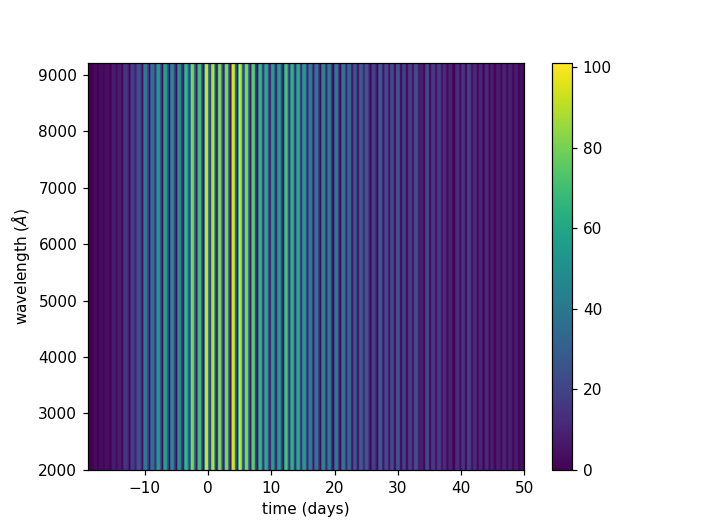

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib notebook
#x, y, z = np.loadtxt('density.dat', unpack=True)
#z = z.reshape(50,50)
plt.imshow(density, extent=(np.amin(density_x), np.amax(density_x), np.amin(density_y), np.amax(density_y)), cmap=cm.viridis, aspect='auto',interpolation = 'bilinear')
plt.colorbar()
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()

In [20]:
fluxes_hist

[array(5.14301467e-16),
 array(6.31791737e-17),
 array(9.04123245e-14),
 array(3.41602219e-15),
 array(1.09305277e-15),
 array(3.69953884e-16),
 array(2.08693159e-15),
 array(1.57325159e-15),
 array(1.57325159e-15),
 array(3.80113876e-15),
 array(7.2497967e-16),
 array(4.19681707e-14),
 array(8.05326539e-16),
 array(8.8642543e-15),
 array(2.22075517e-15),
 array(7.37754535e-14),
 array(1.00976285e-15),
 array(2.28234311e-15),
 array(3.83935359e-16),
 array(1.43860362e-14),
 array(4.6112565e-15),
 array(3.06784011e-16),
 array(2.26771556e-17),
 array(2.75529557e-15),
 array(1.09114855e-15),
 array(1.02094263e-15),
 array(7.34329907e-16),
 array(4.47360436e-15),
 array(4.9174863e-16),
 array(7.76796585e-16),
 array(8.10382387e-13),
 array(8.39287254e-16),
 array(2.16544488e-15),
 array(5.27110749e-15),
 array(1.07121046e-15),
 array(3.45087948e-16),
 array(4.56078339e-15),
 array(2.92081273e-15),
 array(1.3490239e-15),
 array(1.66216464e-14),
 array(1.65645632e-16),
 array(3.18472089e-14

In [21]:
np.mean(fluxes_hist)

1.6852477433799863e-14

<IPython.core.display.Javascript object>


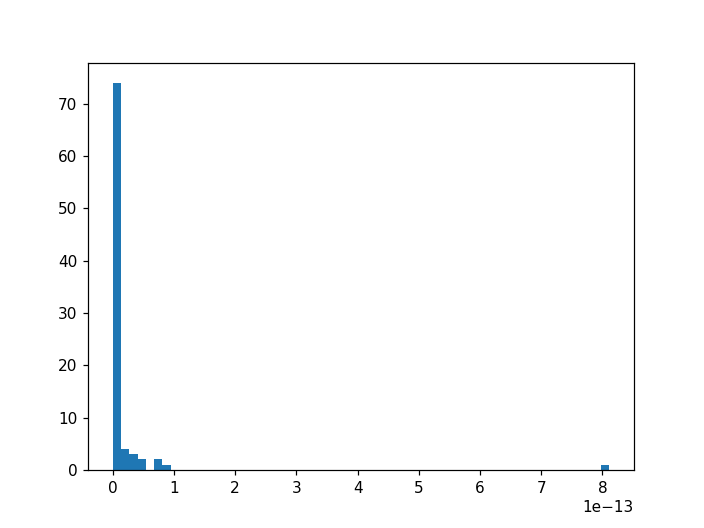

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
histograma = plt.hist(fluxes_hist,range=[min(fluxes_hist), max(fluxes_hist)], bins=60)
#plt.savefig("histograma31_col_com_erros_med_6_2.jpg")
plt.show()

<IPython.core.display.Javascript object>


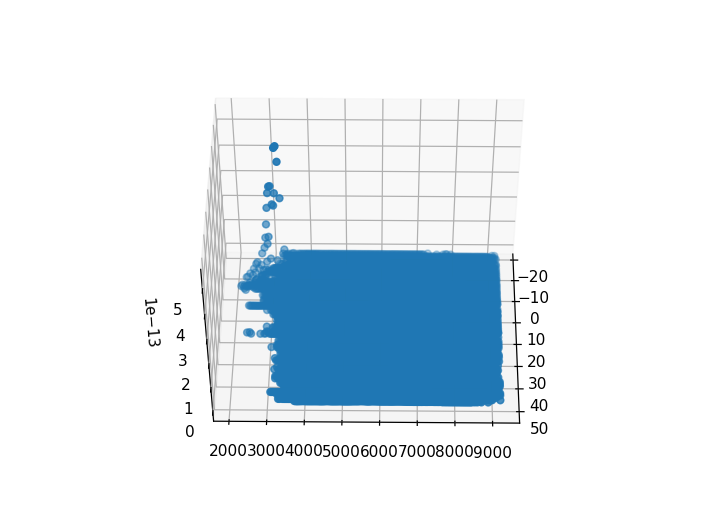

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx_test, yy_test, mean_flux)
#ax.set_zlim3d(0,0.1e-12)
plt.show()

In [ ]:
table = []
for k in range(0,len(xx_test)):
    table.append((xx_test[k], yy_test[k], mean_flux[k]))

f = open("M0.dat", 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()

In [24]:
import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(xx_test,yy_test,mean_flux,function='linear')

In [83]:
x_grid = np.linspace(-20, 50, 71)
y_grid = np.linspace(3750, 7000, 40)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

<IPython.core.display.Javascript object>


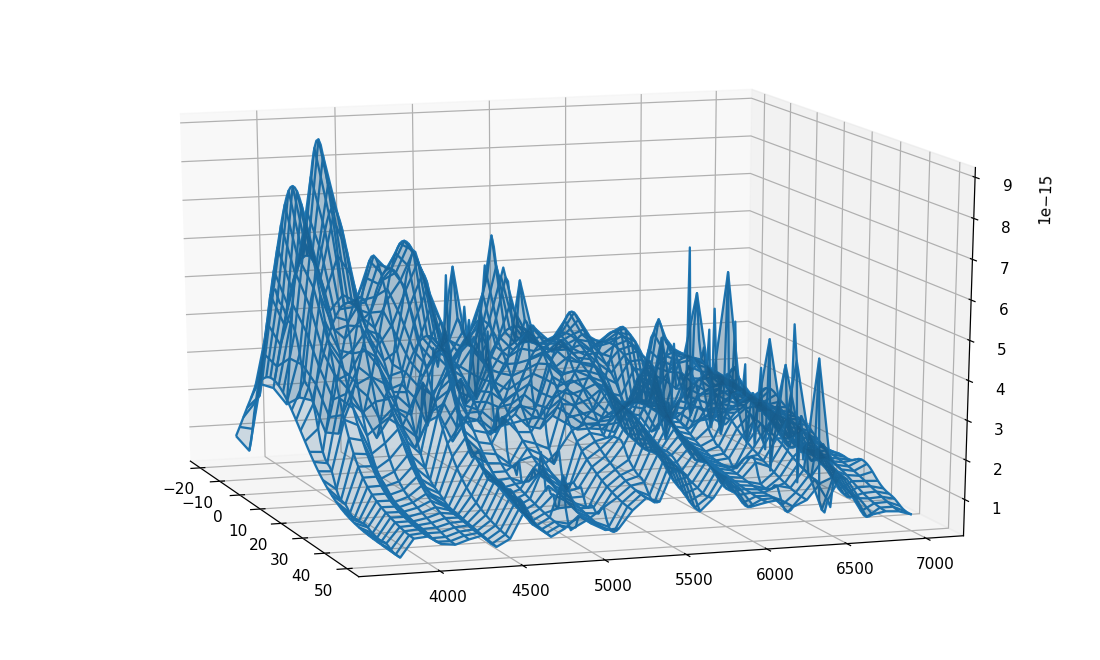

In [84]:
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp
#Z = interp.griddata((xx_test,yy_test),mean_flux,(B1,B2),method='cubic')
Z = spline(B1, B2)
%matplotlib notebook
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
#ax.scatter3D(xx_test,yy_test,mean_flux, c='r')

plt.show()

In [82]:
x_grid

array([-20.        , -18.98550725, -17.97101449, -16.95652174,
       -15.94202899, -14.92753623, -13.91304348, -12.89855072,
       -11.88405797, -10.86956522,  -9.85507246,  -8.84057971,
        -7.82608696,  -6.8115942 ,  -5.79710145,  -4.7826087 ,
        -3.76811594,  -2.75362319,  -1.73913043,  -0.72463768,
         0.28985507,   1.30434783,   2.31884058,   3.33333333,
         4.34782609,   5.36231884,   6.37681159,   7.39130435,
         8.4057971 ,   9.42028986,  10.43478261,  11.44927536,
        12.46376812,  13.47826087,  14.49275362,  15.50724638,
        16.52173913,  17.53623188,  18.55072464,  19.56521739,
        20.57971014,  21.5942029 ,  22.60869565,  23.62318841,
        24.63768116,  25.65217391,  26.66666667,  27.68115942,
        28.69565217,  29.71014493,  30.72463768,  31.73913043,
        32.75362319,  33.76811594,  34.7826087 ,  35.79710145,
        36.8115942 ,  37.82608696,  38.84057971,  39.85507246,
        40.86956522,  41.88405797,  42.89855072,  43.91

In [85]:
tablex = []
tabley = []
tablez = []

#stepx = (10+30)/40
stepy = (7000-3750)/39

gridx = -20
while gridx < 50:
    gridy = 3750
    while gridy <7000:
        tablex.append(gridx)
        tabley.append(gridy)
        tablez.append(spline(gridx,gridy))
        
        gridy += stepy
    gridx += 1
        

In [86]:
table = []
for k in range(0,len(tablez)):
    table.append((tablex[k], tabley[k], tablez[k]))

f = open("realM0.dat", 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()

In [ ]:
%matplotlib notebook
histograma = plt.hist(histo_photo,range=[min(histo_photo), 30], bins=60)
#plt.savefig("histograma31_col_com_erros_med_6_2.jpg")
plt.show()